

downloaded [yolov5 from](https://github.com/ultralytics/yolov5) and used roboflow ai to package and dowload th files according to the [instructions here](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data). I imported the best weights the first CNN (groceryMerchandiseAnnotater) and placed them here:
* [groceryMerchandiseAnnotater](/home/henri/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/yolov5/runs/train/MerchandiseDetector/weights/best.pt)
* [spicyMNIST](/home/henri/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/yolov5/runs/train/SpicyMNIST/weights/best.pt)

create imageAugmenterPipeline is now a fully functioning py file that add variety from a limited data (manually annotated). It does so by transforming labels and data(numpyArray) using imgAug to manage the transformation and the boxes. It was difficult since I had to create a format conversion between yolo(x,y,w,h) to x1,y1,x2,y2. The functions are stored in datAug. But it loads, change, and save the data accurately

### to train the first NN:

we created a spider to randomly select stores and then randomly download all the data in a mongoDB and the image on our local file system(/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData). We manually annotated about 160 images containing sometimes a 100 box each. We have two class [price, description] but later we will find out that we really only need 

detect data location: /home/henri/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/flyers 
train data location:    (roboflow ai curl)
1. Data does through the NN1 (grocery scraped info merchandise identifier)
* output data(temp location): /home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/roboflow(test)/
* more permanent /home/henri/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/yolov5/runs/detect/ 


the NN1Prepipeline is now a fully functioning py file that takes the results from yolov5 with groceeryMerchandise weight. crop and save in separate files each section that have beeen identified as fitting the description (merchandise). it saves it in the the following drive 

### to train the second NN:

Minist folder uses and adapted  version of [yolo2](https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3) location on [local drive](~/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/mnist). The folder allows you to generate the proper yolo txt format for roboflow ai to package it while the program written by the author generates data from individual mnist single digit. To create the data you do (in the same location as the file)
python make_data.py 

2. The second NN and tries to detect
* train data location:
* detect data location: /home/henri/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/flyers
* Output: /home/henri/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/yolov5/runs/detects

### yolo command for NN1: (to be tried)
* detect: python detect.py --weights runs/train/MerchandiseDetector/weights/best.pt --img 416 --conf 0.4 --source ../groceryPred --img-size 416
* train (about 800 epochs with batch size of 32)
### yolo command for NN2:

* train : python train.py --img 416 --batch 32 --epochs 70 --data data.yaml
    * check: [yolov5 demo](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data)
* detect: python detect.py --weights runs/train/SpicyMNIST/weights/best.pt --img 416 --conf 0.4 --source ../groceryPred --img-size 416

### yolo command for NN2(SVHN)
* train: python train.py --img 416 --batch 32 --epochs 250 --data ../data.yaml --weights yolov5s.pt
* detect: python detect.py --weights runs/train/SVHN-1300img/weights/best.pt --img 416 --conf 0.4 --source ../groceryPred --img-size 416


Since the first second NN didn't perform well I used the SVHN databet(1300 pictures) to train the second NN again.
We created SVHMbboxPipeline.py to transform the weird format into yolo. The label dataset came in .mat file and it was cahllenging to extract and reformat the data but luckily there was some help online. Trained the model with 1300 img and 300 epochs and had about 56% precision which is not great.

The model detected more but not as much as I wanted to. maybe train another model by shuffling more data in the train data? I think that I could run another one since the gtx 1070 evga sc has 8gb ram so about 2000 more pictures.


## possible needs
* try with unseen data scraped from the web and finalize the pipeline.
* compare the difference between them
* wrap up the project


```# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]```

In [1]:
from datAug import *

In [2]:
# mainUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/roboflow Preds(73p)/'
mainUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/roboflow(test)/'
AnnotedUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/roboflow Preds(73p)/'
testUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/predsResults/'

In [3]:
directory = directoryImgTxtload(mainUrl,info=False)
directory[0:2]

[['101aug0_jpg.rf.5dc4855b0b8d00032ce73df506c818fd.jpg',
  '101aug0_jpg.rf.5dc4855b0b8d00032ce73df506c818fd.txt'],
 ['102aug1_jpg.rf.330ff2119e6c7664e1dd2736ff82a0e5.jpg',
  '102aug1_jpg.rf.330ff2119e6c7664e1dd2736ff82a0e5.txt']]

In [4]:
f=2

In [5]:
# slicing numpy
imageArray = loadImgToArray(mainUrl + directory[f][0], info=True)
test = loadingBBox(mainUrl + directory[f][1],imageArray,info=True)

#saveBBox(testUrl + directory[f][1],test, imageArray,info=True,mode='yolo')

From: <class 'PIL.JpegImagePlugin.JpegImageFile'>, Size: (832, 832), Mode: RGB
To: <class 'numpy.ndarray'>, shape: (832, 832, 3)
using the default mode so the data is converted

image width: 832 and height 832
before transform
<object-class>	<x>	<y>	<width>	<height>:
[[1.        0.234976  0.769231  0.126202  0.0240385]
 [1.        0.459135  0.769231  0.125     0.0288462]
 [0.        0.286659  0.8125    0.219952  0.129808 ]
 [1.        0.241587  0.25      0.115385  0.0288462]
 [1.        0.582933  0.240986  0.117788  0.0252404]
 [0.        0.509615  0.80649   0.211538  0.129808 ]
 [1.        0.574519  0.34976   0.127404  0.0264423]
 [1.        0.586538  0.668269  0.122596  0.03125  ]
 [1.        0.239183  0.439904  0.132212  0.0288462]
 [1.        0.239183  0.5625    0.127404  0.03125  ]
 [1.        0.238582  0.662861  0.13101   0.0276442]
 [1.        0.239183  0.346755  0.137019  0.0300481]
 [1.        0.581731  0.561899  0.134615  0.0324519]
 [1.        0.677885  0.766226  0.115385  0

In [6]:

test[:,1::]

array([[143.       , 630.000176 , 248.000064 , 650.000208 ],
       [330.00032  , 628.0001728, 434.00032  , 652.0002112],
       [147.000256 , 621.999872 , 330.00032  , 730.000128 ],
       [153.000224 , 195.9999808, 249.000544 , 220.0000192],
       [436.000448 , 190.0003456, 534.000064 , 211.0003584],
       [335.999872 , 616.999552 , 511.999488 , 724.999808 ],
       [424.999744 , 280.0003232, 530.999872 , 302.0003168],
       [436.99968  , 542.999808 , 538.999552 , 568.999808 ],
       [144.000064 , 354.0001088, 254.000448 , 378.0001472],
       [146.000192 , 455.       , 252.00032  , 481.       ],
       [144.000064 , 540.0003648, 253.000384 , 563.0003392],
       [142.000352 , 276.0001504, 256.00016  , 301.0001696],
       [428.000352 , 453.9999776, 540.000032 , 480.9999584],
       [516.00016  , 625.0000224, 612.00048  , 650.0000416],
       [425.999808 , 365.0000224, 536.000192 , 390.0000416],
       [511.999904 , 621.999872 , 705.99984  , 730.000128 ],
       [141.99952  , 178

In [7]:
int(test[:,0:1:][0])

1

In [8]:
labelTranslator = {0: 'Merchandise',1:'price'}
labelTranslator[int(test[:,0:1:][0])]

'price'

In [9]:
def whatIsIT(classBox):
    labelTranslator = {0: 'Merchandise',1:'price'}
    return labelTranslator[int(classBox)]

In [58]:
# slicing numpy
f=60
results = dict()
imageArray = loadImgToArray(mainUrl + directory[f][0], info=False)
test = loadingBBox(mainUrl + directory[f][1],imageArray,info=False)
for i in range(len(test[:,1::])):
    firstBox = test[:,1::][i]
    classBox = whatIsIT(test[:,0:1:][i])
    testImg = imageArray[int(firstBox[1]):int(firstBox[3]) , int(firstBox[0]):int(firstBox[2]),:]
    if  classBox=='Merchandise':
        print('Saved')
        results[i] = [test[i],testImg]
    # info
    #print(f'Class: {classBox}\nbox coords \t<x1>\t<y1>\t<x2>\t<y2>:\n{firstBox}')
    #showImg(testImg)
#reindexing the dict results
reindexDict = {i: v for i, v in enumerate(results.values())}

Saved
Saved
Saved


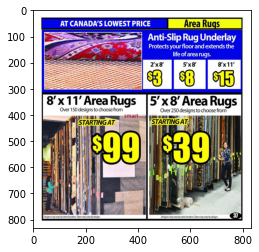

In [59]:
    showImg(imageArray)

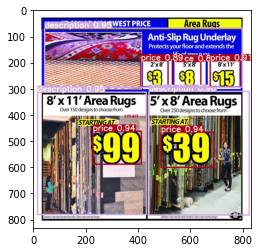

In [60]:

showImg(loadImgToArray(AnnotedUrl + directory[f][0], info=False))

In [54]:
loadingBBox(mainUrl + directory[f][1],imageArray,info=False)

array([[  1.       , 338.999856 , 583.999936 , 409.999824 , 609.999936 ],
       [  1.       ,  63.0002464, 326.0001472, 127.0002656, 354.0001088],
       [  1.       , 467.9999168, 513.999824 , 543.9999552, 545.999792 ],
       [  1.       , 757.9999232, 762.999952 , 824.9998848, 795.999984 ],
       [  1.       , 769.9996928, 216.9998688, 831.9996672, 246.9998752],
       [  1.       , 205.9996224, 768.0001472, 275.9996096, 796.0001088],
       [  1.       ,  74.0000352, 770.0002752, 135.0000288, 798.0002368],
       [  1.       ,  72.0001152, 707.00032  , 140.0001408, 733.00032  ],
       [  1.       , 201.000176 , 706.000256 , 273.000208 , 732.000256 ],
       [  1.       ,  64.9999168, 449.9997632, 139.9998912, 478.9997888],
       [  1.       , 750.9996416, 640.999632 , 823.9996544, 672.9996   ],
       [  1.       ,  63.0004128, 133.0002752, 132.0004192, 162.0003008],
       [  1.       , 771.9997376, 200.9997184, 831.9997504, 231.9997056],
       [  1.       , 609.9998528, 641.

Easier to slice using np arrays than pil format 

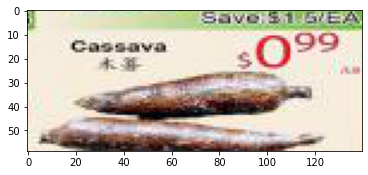

In [55]:
plt.imshow(reindexDict[0][1])

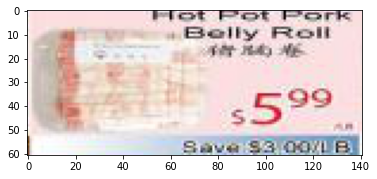

In [56]:
plt.imshow(reindexDict[2][1])

number of items 64
From: <class 'numpy.ndarray'>, shape: (58, 131, 3)
To: <class 'PIL.Image.Image'>, Size: (131, 58), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (61, 141, 3)
To: <class 'PIL.Image.Image'>, Size: (141, 61), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (59, 138, 3)
To: <class 'PIL.Image.Image'>, Size: (138, 59), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (58, 137, 3)
To: <class 'PIL.Image.Image'>, Size: (137, 58), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (61, 146, 3)
To: <class 'PIL.Image.Image'>, Size: (146, 61), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (58, 144, 3)
To: <class 'PIL.Image.Image'>, Size: (144, 58), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (59, 138, 3)
To: <class 'PIL.Image.Image'>, Size: (138, 59), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (60, 131, 3)
To: <class 'PIL.Image.Image'>, Size: (131, 60), Mode: RGB
From: <class 'numpy.ndarray'>, shape: (60, 146, 3)
To: <class 'PIL.Image.Image'>, Size: (146, 60), Mode: RGB


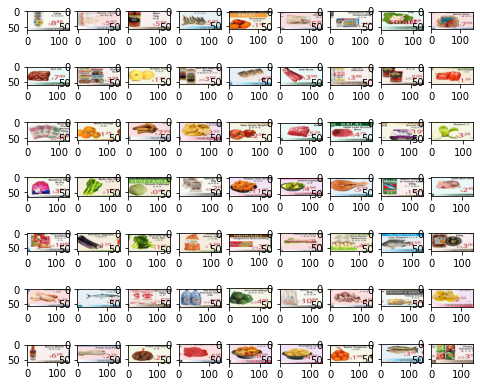

In [57]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 8))
columns = round(sqrt(len(reindexDict))) + 1
rows = round(sqrt(len(reindexDict))) 
print(f'number of items {len(reindexDict)}')
for i in range(1, columns*rows +1):

    if i< len(reindexDict):
        img = reindexDict[i][1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        saveArrayToImg("/home/henri/Documents/Lighthouse-lab/Databases/final project db/MNIST-Spicy/groceryPred/" + str(i) +'results.jpeg',img,info=True)
    else:
        pass
plt.show()


'/home/henri/Documents/Lighthouse-lab/Databases/final project db/yolov5/train'